# Analysis 1
- Considering only part time position petitions for H1B in 2016.
- Analyzing the total CERTIFIED and DENIED H1B petitions of each SOC_NAME of each state.
- Calculating the success ratio of H1B petitions from DoL(Dept. of Labor) for each state and finding out the worst 3 SOC_NAME from each state
- Plotting the top 10 states with the best success ratio for H1B petitions.

In [1]:
import pandas as pd
import numpy as np
import os
import datetime
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

/Users/kvs25/anaconda3/lib/python3.5/site-packages/numexpr/cpuinfo.py:53: UserWarning: [Errno 2] No such file or directory: 'arch'
  stacklevel=stacklevel + 1)
/Users/kvs25/anaconda3/lib/python3.5/site-packages/numexpr/cpuinfo.py:53: UserWarning: [Errno 2] No such file or directory: 'machine'
  stacklevel=stacklevel + 1)
/Users/kvs25/anaconda3/lib/python3.5/site-packages/numexpr/cpuinfo.py:76: UserWarning: [Errno 2] No such file or directory: 'sysctl'
  stacklevel=stacklevel + 1):


In [2]:
os.path.exists('data/H1B_petition_dataset.csv')

True

In [3]:
df = pd.read_csv('data/H1B_petition_dataset.csv', encoding = "ISO-8859-1")

In [4]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,STATE,lon,lat
0,DENIED,CARNEGIE MELLON UNIVERSITY,COMPUTER AND INFORMATION RESEARCH SCIENTISTS,RESEARCH ASSOCIATE,Y,6044480.0,2016,PITTSBURGH,PENNSYLVANIA,-79.995886,40.440625
1,DENIED,TIGHTEN CO,WEB DEVELOPERS,WEB DEVELOPER,Y,4316000.0,2016,DALLAS,TEXAS,-96.796988,32.776664
2,WITHDRAWN,GLOBAL INFOTECH CORPORATION,COMPUTER PROGRAMMERS,COMPUTER PROGRAMMER,Y,4193280.0,2016,SAN FRANCISCO,CALIFORNIA,-122.419415,37.774929
3,DENIED,SYNTEL INC,COMPUTER SYSTEMS ANALYSTS,PROGRAMMER ANALYST,Y,4087356.0,2016,QUINCY,MASSACHUSETTS,-71.002270,42.252877
4,WITHDRAWN,IBM INDIA PRIVATE LIMITED,COMPUTER PROGRAMMERS,LEAD DATA SPECIALIST,Y,3277248.0,2016,TAMPA,FLORIDA,-82.457178,27.950575


In [5]:
df.shape

(647731, 11)

In [6]:
#Analyzing only the H1B criteria for part time positions
data= df[df.FULL_TIME_POSITION=='N']

In [7]:
data.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,STATE,lon,lat
296590,CERTIFIED,LIGHT & STAR USA INC,CHIEF EXECUTIVES,CHIEF FINANACIAL OFFICER,N,70000.0,2016,NEW YORK,NEWYORK,-74.005941,40.712784
296591,CERTIFIED,"NATIONAL OILWELL VARCO, L.P.",MARKETING MANAGERS,COMMERCIALIZATION SERVICES MANAGER,N,70000.0,2016,HOUSTON,TEXAS,-95.369803,29.760427
296592,CERTIFIED,"BELLY, INC",MARKETING MANAGERS,DEMAND GENERATION MANAGER,N,70000.0,2016,CHICAGO,ILLINOIS,-87.629798,41.878114
296593,CERTIFIED,AMERICAN BEVERAGE DEPOT LLC,MARKETING MANAGERS,PRODUCT MARKETING MANAGER,N,70000.0,2016,MEDLEY,FLORIDA,-80.326440,25.840653
296594,CERTIFIED,"NATIONAL OILWELL VARCO, L.P.",MARKETING MANAGERS,COMMERCIALIZATION SERVICES MANAGER,N,70000.0,2016,HOUSTON,TEXAS,-95.369803,29.760427


In [8]:
#taking only cases where the status has been 'CERTIFIED' by the DoL
success = data['CASE_STATUS'] == 'CERTIFIED'


In [9]:
new_data =data[success]

In [10]:
new_data.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,STATE,lon,lat
296590,CERTIFIED,LIGHT & STAR USA INC,CHIEF EXECUTIVES,CHIEF FINANACIAL OFFICER,N,70000.0,2016,NEW YORK,NEWYORK,-74.005941,40.712784
296591,CERTIFIED,"NATIONAL OILWELL VARCO, L.P.",MARKETING MANAGERS,COMMERCIALIZATION SERVICES MANAGER,N,70000.0,2016,HOUSTON,TEXAS,-95.369803,29.760427
296592,CERTIFIED,"BELLY, INC",MARKETING MANAGERS,DEMAND GENERATION MANAGER,N,70000.0,2016,CHICAGO,ILLINOIS,-87.629798,41.878114
296593,CERTIFIED,AMERICAN BEVERAGE DEPOT LLC,MARKETING MANAGERS,PRODUCT MARKETING MANAGER,N,70000.0,2016,MEDLEY,FLORIDA,-80.326440,25.840653
296594,CERTIFIED,"NATIONAL OILWELL VARCO, L.P.",MARKETING MANAGERS,COMMERCIALIZATION SERVICES MANAGER,N,70000.0,2016,HOUSTON,TEXAS,-95.369803,29.760427


In [11]:
output1=new_data.groupby(['STATE','SOC_NAME'],as_index=False)['CASE_STATUS'].count().sort_values(by=['STATE','CASE_STATUS'],ascending=[True,False])

In [12]:
#output2.head()
#output=new_data.groupby(['STATE','SOC_NAME'], as_index=False)[['PREVAILING_WAGE']].mean().sort_values(by=['STATE','PREVAILING_WAGE'],ascending=[True,False])

In [13]:
output2=data[data.CASE_STATUS=='DENIED'].groupby(['STATE','SOC_NAME'],as_index=False)['CASE_STATUS'].count().sort_values(by=['STATE','CASE_STATUS'],ascending=[True,False])

In [14]:
#output['CERTIFIED_COUNT']= new_data.groupby(['STATE','SOC_NAME'])[['PREVAILING_WAGE']].count().PREVAILING_WAGE
result = pd.merge(output1, output2, how='left', on=['STATE', 'SOC_NAME'])

In [15]:
result.head()

,STATE,SOC_NAME,CASE_STATUS_x,CASE_STATUS_y
0,ALABAMA,"SOFTWARE DEVELOPERS, APPLICATIONS",186,NaN
1,ALABAMA,COMPUTER SYSTEMS ANALYSTS,156,NaN
2,ALABAMA,COMPUTER PROGRAMMERS,111,3.0
3,ALABAMA,MANAGEMENT ANALYSTS,56,NaN
4,ALABAMA,ACCOUNTANTS AND AUDITORS,48,1.0


In [16]:
result=result.rename(index=str, columns={"CASE_STATUS_x": "CERTIFIED_COUNT","CASE_STATUS_y": "DENIED_COUNT"})

In [17]:
result=result.fillna(0)

In [18]:
#taking the CERTIFIED & DENIED count for each SOC_NAME from each state
result.head()

,STATE,SOC_NAME,CERTIFIED_COUNT,DENIED_COUNT
0,ALABAMA,"SOFTWARE DEVELOPERS, APPLICATIONS",186,0.0
1,ALABAMA,COMPUTER SYSTEMS ANALYSTS,156,0.0
2,ALABAMA,COMPUTER PROGRAMMERS,111,3.0
3,ALABAMA,MANAGEMENT ANALYSTS,56,0.0
4,ALABAMA,ACCOUNTANTS AND AUDITORS,48,1.0


In [19]:
result['success_ratio']= (result['CERTIFIED_COUNT']/(result['CERTIFIED_COUNT']+result['DENIED_COUNT']))*100

In [20]:
result.head()

,STATE,SOC_NAME,CERTIFIED_COUNT,DENIED_COUNT,success_ratio
0,ALABAMA,"SOFTWARE DEVELOPERS, APPLICATIONS",186,0.0,100.000000
1,ALABAMA,COMPUTER SYSTEMS ANALYSTS,156,0.0,100.000000
2,ALABAMA,COMPUTER PROGRAMMERS,111,3.0,97.368421
3,ALABAMA,MANAGEMENT ANALYSTS,56,0.0,100.000000
4,ALABAMA,ACCOUNTANTS AND AUDITORS,48,1.0,97.959184


In [21]:
r4=result.groupby(['STATE']).apply(lambda x:x.sort_values('success_ratio',ascending=True))

In [22]:
r5=r4.groupby('STATE').head(3)

In [23]:

r5.head()

STATE                                    SOC_NAME  \
STATE                                                              
ALABAMA 95   ALABAMA                        CHEFS AND HEAD COOKS   
        128  ALABAMA          PSYCHOLOGY TEACHERS, POSTSECONDARY   
        104  ALABAMA                       COUNSELORS, ALL OTHER   
ALASKA  175   ALASKA  HEALTH SPECIALTIES TEACHERS, POSTSECONDARY   
        151   ALASKA                        ENGINEERS, ALL OTHER   

             CERTIFIED_COUNT  DENIED_COUNT  success_ratio  
STATE                                                      
ALABAMA 95                 1           2.0      33.333333  
        128                1           1.0      50.000000  
        104                1           1.0      50.000000  
ALASKA  175                1           1.0      50.000000  
        151                2           2.0      50.000000

In [24]:
r6=r5.reset_index(level=1, drop=False)

In [25]:
del r6['level_1']

In [26]:
r7=r6.reset_index(level=0, drop=True)

In [27]:
#the top 3 jobs in each state having the worst H1B conversion ratio
r7.head()

,STATE,SOC_NAME,CERTIFIED_COUNT,DENIED_COUNT,success_ratio
0,ALABAMA,CHEFS AND HEAD COOKS,1,2.0,33.333333
1,ALABAMA,"PSYCHOLOGY TEACHERS, POSTSECONDARY",1,1.0,50.000000
2,ALABAMA,"COUNSELORS, ALL OTHER",1,1.0,50.000000
3,ALASKA,"HEALTH SPECIALTIES TEACHERS, POSTSECONDARY",1,1.0,50.000000
4,ALASKA,"ENGINEERS, ALL OTHER",2,2.0,50.000000


In [28]:
result.head()

,STATE,SOC_NAME,CERTIFIED_COUNT,DENIED_COUNT,success_ratio
0,ALABAMA,"SOFTWARE DEVELOPERS, APPLICATIONS",186,0.0,100.000000
1,ALABAMA,COMPUTER SYSTEMS ANALYSTS,156,0.0,100.000000
2,ALABAMA,COMPUTER PROGRAMMERS,111,3.0,97.368421
3,ALABAMA,MANAGEMENT ANALYSTS,56,0.0,100.000000
4,ALABAMA,ACCOUNTANTS AND AUDITORS,48,1.0,97.959184


In [29]:
#finding statewise H1B petitions success rate and sorting according to the best places to apply for H1B in USA

In [30]:
graph_data=new_data.groupby('STATE')[['CASE_STATUS']].count()

In [31]:
graph_data['DENIED']=data[data.CASE_STATUS=='DENIED'].groupby('STATE')[['CASE_STATUS']].count()

In [32]:
graph_data['ratio']= (graph_data['CASE_STATUS']/(graph_data['CASE_STATUS']+graph_data['DENIED']))*100

In [45]:
graph_data=graph_data.sort_values(by=['ratio'],ascending=False)

In [46]:
graph_data=graph_data.reset_index(level=0, drop=False)

In [47]:
graph_data.head()

,level_0,index,STATE,CASE_STATUS,DENIED,ratio
0,0,0,MAINE,411,3,99.275362
1,1,1,NEWHAMPSHIRE,939,7,99.260042
2,2,2,DELAWARE,1461,12,99.185336
3,3,3,MISSOURI,4810,45,99.073120
4,4,4,NEWJERSEY,25787,245,99.058851


In [43]:
states_data= graph_data.sort_values(by=['CASE_STATUS'],ascending=False)

In [48]:
del states_data['index']

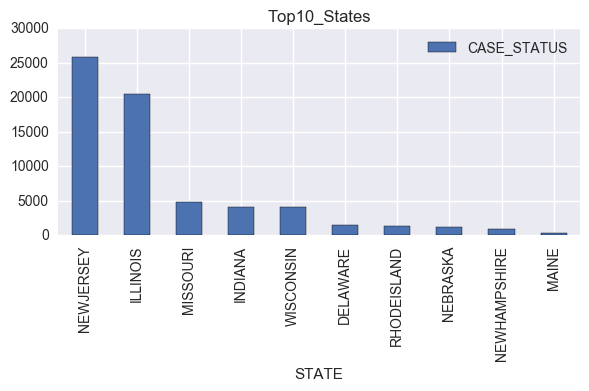

In [49]:

#have to do this again
states_data.sort_values(by=['CASE_STATUS'],ascending=False).plot.bar(x='STATE',y='CASE_STATUS',stacked=True,title='Top10_States',legend=True)
plt.tight_layout()
plt.gcf().savefig('ana_1/Top10_States.png')

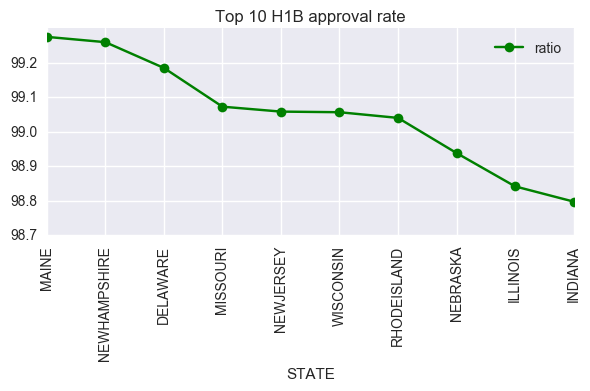

In [50]:
graph_data.plot.line(x='STATE',y='ratio',title='Top 10 H1B approval rate',legend=True, rot=90,marker='o', color='g')
plt.tight_layout()
plt.gcf().savefig('ana_1/Top10_ApprovalRate.png')